In [183]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

250000

In [185]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [186]:
num_train_rows, num_train_columns = train.shape
num_test_rows, num_test_columns = test.shape

print("train")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of columns: {num_train_columns}")

print("test")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of columns: {num_test_columns}")

train
Number of Rows: 750000
Number of columns: 9
test
Number of Rows: 250000
Number of columns: 8


In [187]:
missing_values_train = pd.DataFrame({"Feature": train.columns,
                                     "[TRAIN] No. of Missing Values": train.isnull().sum().values,
                                     "[TRAIN] % of missing Values": ((train.isnull().sum().values) / len(train) * 100)})

missing_values_test = pd.DataFrame({"Feature": test.columns,
                                    "[TEST] No. of Missing Values": test.isnull().sum().values,
                                    "[TEST] % of missing Values": ((test.isnull().sum().values) / len(test) * 100)})

merged_df = pd.merge(missing_values_train, missing_values_test, on="Feature", how="left")

merged_df


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Feature,[TRAIN] No. of Missing Values,[TRAIN] % of missing Values,[TEST] No. of Missing Values,[TEST] % of missing Values
0,id,0,0.0,0.0,0.0
1,Sex,0,0.0,0.0,0.0
2,Age,0,0.0,0.0,0.0
3,Height,0,0.0,0.0,0.0
4,Weight,0,0.0,0.0,0.0
5,Duration,0,0.0,0.0,0.0
6,Heart_Rate,0,0.0,0.0,0.0
7,Body_Temp,0,0.0,0.0,0.0
8,Calories,0,0.0,NaN,NaN


In [188]:
train.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [189]:
target_variable = "Calories"
numerical_variables = [c for c in test.columns if test[c].dtype in ("int64", "float64")]

In [190]:
del numerical_variables[0]
numerical_variables

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


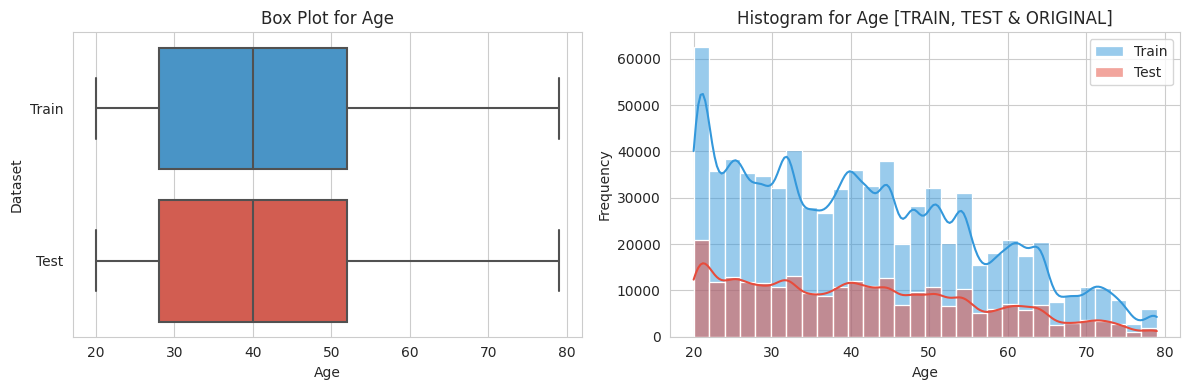

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


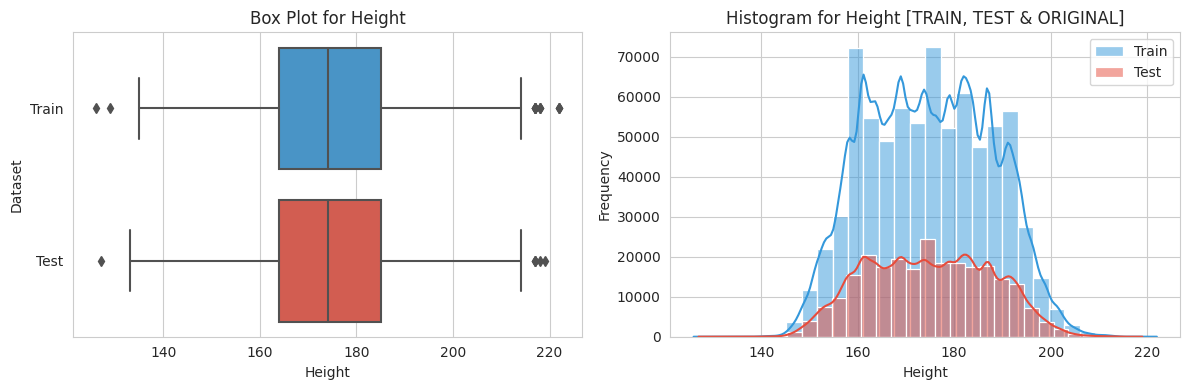

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


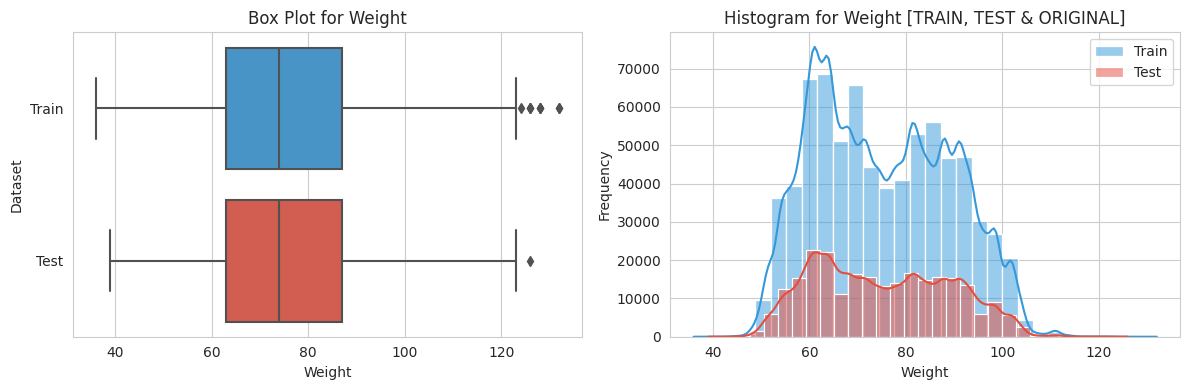

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


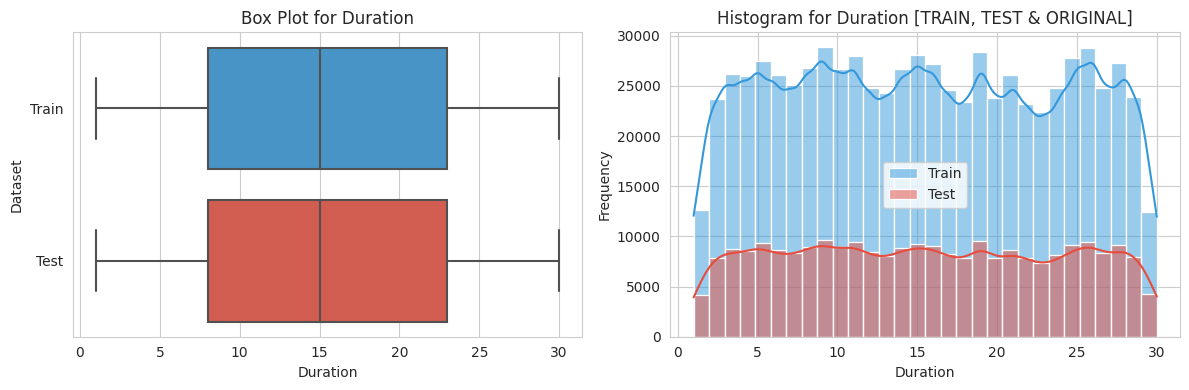

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


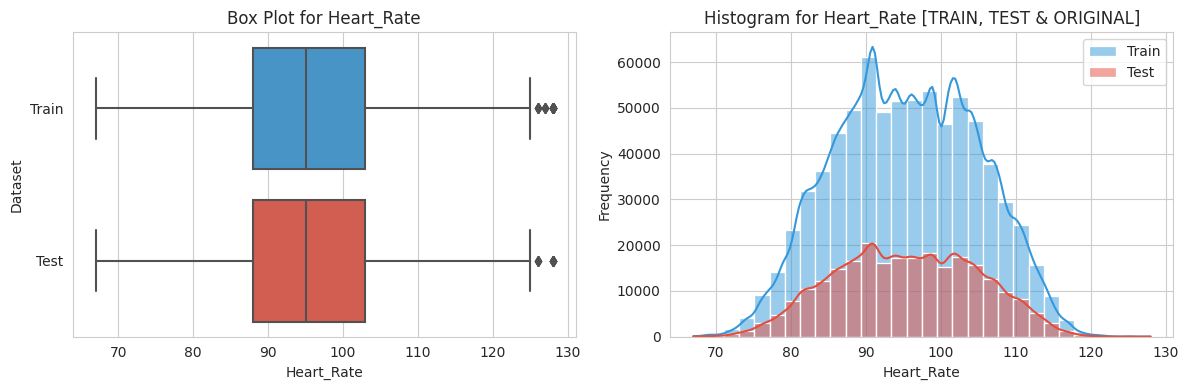

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


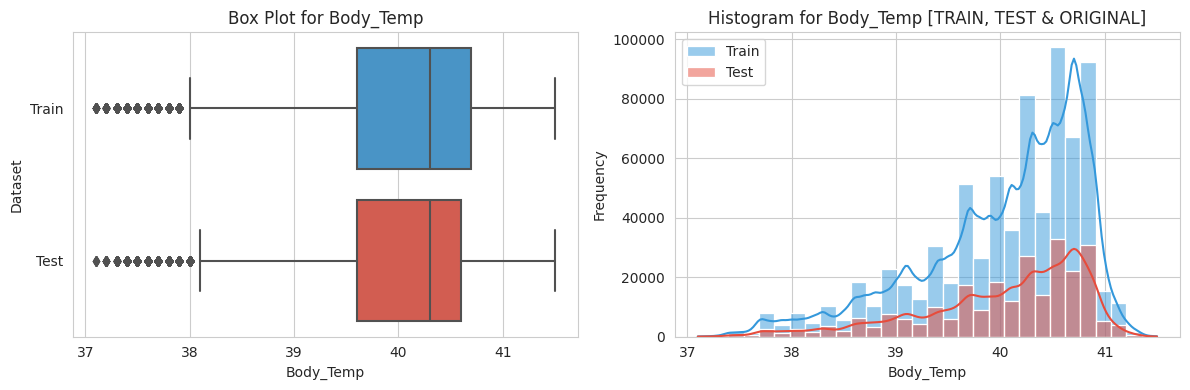

In [191]:
custom_palette = ['#3498db', '#e74c3c']

train["Dataset"] = "Train"
test["Dataset"] = "Test"

variables = numerical_variables

def create_variable_plots(variable):
  sns.set_style("whitegrid")
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))
  
  plt.subplot(1, 2, 1)
  sns.boxplot(data=pd.concat([train, test]), x=variable, y="Dataset", palette=custom_palette)
  plt.xlabel(variable)
  plt.title(f"Box Plot for {variable}")
  
  plt.subplot(1, 2, 2)
  sns.histplot(data=train, x=variable, color=custom_palette[0], kde=True, bins=30, label="Train")
  sns.histplot(data=test, x=variable, color=custom_palette[1], kde=True, bins=30, label="Test")
  plt.xlabel(variable)
  plt.ylabel("Frequency")
  plt.title(f"Histogram for {variable} [TRAIN, TEST & ORIGINAL]")
  plt.legend()
  
  plt.tight_layout()
  
  plt.show()

for variable in variables:
  create_variable_plots(variable=variable)

train.drop("Dataset", axis=1, inplace=True)
test.drop("Dataset", axis=1, inplace=True)
  


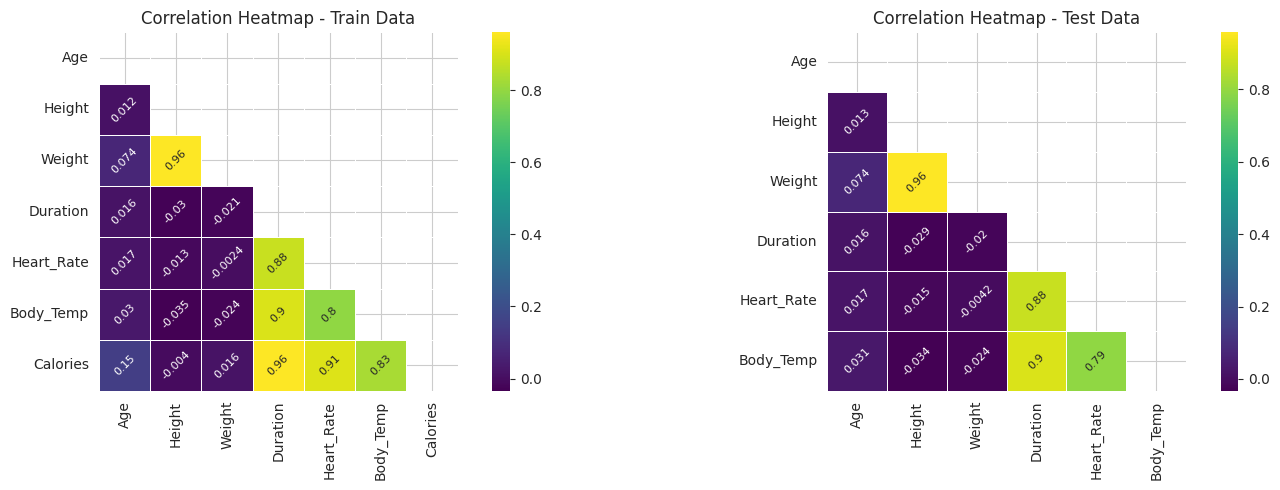

In [192]:
test_variables = numerical_variables
train_variables = numerical_variables + ["Calories"]

corr_train = train[train_variables].corr()
corr_test = test[test_variables].corr()

mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
mask_test = np.triu(np.ones_like(corr_test, dtype=bool))

annot_kws = {"size": 8, "rotation": 45}

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax_train = sns.heatmap(corr_train, mask=mask_train, cmap="viridis", annot=True,
                       square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title("Correlation Heatmap - Train Data")

plt.subplot(1, 2, 2)
ax_test = sns.heatmap(corr_test, mask=mask_test, cmap="viridis", annot=True,
                      square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title("Correlation Heatmap - Test Data")

plt.tight_layout()

plt.show()

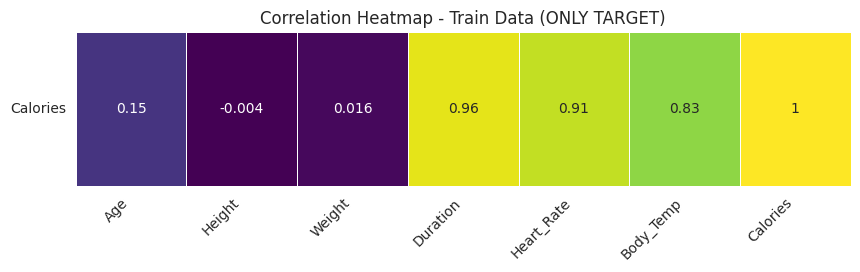

In [193]:
corr_train = train[train_variables].corr()[["Calories"]].T
annot_kws = {"size": 10}

plt.figure(figsize=(10, 2))
ax_train = sns.heatmap(corr_train, cmap="viridis", annot=True,
                       square=False, linewidths=0.5, annot_kws=annot_kws,
                       cbar=False)

plt.xticks(rotation=45, ha="right")
plt.title("Correlation Heatmap - Train Data (ONLY TARGET)")
plt.yticks(rotation=0)

plt.show()

In [194]:
len(train)

750000

In [195]:
from category_encoders import TargetEncoder
from sklearn.model_selection import KFold

train["Sex_te_oof"] = np.nan
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for tr_idx, val_idx in kf.split(train):
  te = TargetEncoder(smoothing=0.3)
  te.fit(train.loc[tr_idx, ["Sex"]], train.loc[tr_idx, "Calories"])
  train.loc[val_idx, "Sex_te_oof"] = te.transform(train.loc[val_idx, ["Sex"]])["Sex"].values

corr_oof = train["Sex_te_oof"].corr(train["Calories"])
corr_oof

0.011849706895198733

In [196]:
features = ["Duration", "Heart_Rate", "Body_Temp"]
def remove_outliers(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  rows_deleted = len(data) - len(filtered_data)
  return filtered_data, rows_deleted

rows_deleted_total = 0
features_with_outliers = []

for column in features:
  train_filtered, rows_deleted = remove_outliers(train, column)
  if rows_deleted > 0:
    train = train_filtered
    rows_deleted_total += rows_deleted
    features_with_outliers.append(column)

print("**Summary of Outlier Removal:**")
if features_with_outliers:
    print(f"Total rows deleted: {rows_deleted_total}")
    print(f"Features with outliers removed: {features_with_outliers}")
else:
    print("No significant outliers detected. No rows removed.")

**Summary of Outlier Removal:**
Total rows deleted: 14955
Features with outliers removed: ['Heart_Rate', 'Body_Temp']


In [209]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train[features])

scaled_train = minmax_scaler.transform(train[features])
target = train["Calories"]
train = pd.DataFrame(scaled_train, columns=train[features].columns)

scaled_test = minmax_scaler.transform(test[features])
test = pd.DataFrame(scaled_test, columns=test[features].columns)

KeyError: 'Calories'

In [215]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

X_poly = poly.fit_transform(train[features])
features_names = poly.get_feature_names_out(input_features=train[features].columns)
train_poly = pd.DataFrame(X_poly, columns=features_names)

X_poly_test = poly.transform(test[features])
features_names = poly.get_feature_names_out(input_features=test[features].columns)
test_poly = pd.DataFrame(X_poly_test, columns=features_names)

test.info()
test_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Duration    250000 non-null  float64
 1   Heart_Rate  250000 non-null  float64
 2   Body_Temp   250000 non-null  float64
dtypes: float64(3)
memory usage: 5.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Duration              250000 non-null  float64
 1   Heart_Rate            250000 non-null  float64
 2   Body_Temp             250000 non-null  float64
 3   Duration^2            250000 non-null  float64
 4   Duration Heart_Rate   250000 non-null  float64
 5   Duration Body_Temp    250000 non-null  float64
 6   Heart_Rate^2          250000 non-null  float64
 7   Heart_Rate Body_Temp  250000 non-null  float64
 8   Body_

In [216]:
X = train_poly
y = target


In [217]:
from sklearn.metrics import mean_squared_log_error

def rmsle_scorer(y_true, y_pred):
  y_pred = np.clip(y_pred, 0, None)
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [218]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np
import lightgbm as lgb
from tqdm import tqdm

scorer = make_scorer(rmsle_scorer, greater_is_better=False)

params = {
  "objective": "regression",
  "metric": "rmse",
  "learning_rate": 0.05,
  "num_leaves": 31,
  "feature_fraction": 0.8,
  "bagging_fraction": 0.8,
  "bagging_freq": 5,
  "seed": 42,
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []

for fold, (tr_idx, va_idx) in enumerate(tqdm(kf.split(X), total=kf.get_n_splits()), 1):
  X_train, X_val = X.iloc[tr_idx], X.iloc[va_idx]
  y_train, y_val = y.iloc[tr_idx], y.iloc[va_idx]
  
  dtrain = lgb.Dataset(X_train, label=np.log1p(y_train))
  dval = lgb.Dataset(X_val, label=np.log1p(y_val), reference=dtrain)
  
  # evals_result = {}
  # record_cb = lgb.record_evaluation(evals_result)
  gbm = lgb.train(
    params,
    dtrain,
    valid_sets=[dtrain, dval],
  )
  
  y_pred = np.expm1(gbm.predict(X_val, num_iteration=gbm.best_iteration))
  y_pred = np.clip(y_pred, 0, None)
  score = rmsle_scorer(y_val, y_pred)
  print(f"Fold {fold} RMSLE: {score:.4f}")
  fold_scores.append(score)

print()
print(f"Avarage RMSLE: {np.mean(fold_scores):.4f}")


  0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.141163


 20%|██        | 1/5 [00:01<00:04,  1.18s/it]

Fold 1 RMSLE: 0.1350
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.141466


 40%|████      | 2/5 [00:02<00:03,  1.10s/it]

Fold 2 RMSLE: 0.1356
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.140724


 60%|██████    | 3/5 [00:03<00:02,  1.34s/it]

Fold 3 RMSLE: 0.1351
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.140493


 80%|████████  | 4/5 [00:04<00:01,  1.20s/it]

Fold 4 RMSLE: 0.1360
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.141876


100%|██████████| 5/5 [00:05<00:00,  1.20s/it]

Fold 5 RMSLE: 0.1351

Avarage RMSLE: 0.1354


In [220]:
print(len(test_poly))
X_test = test_poly
y_pred_log = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = np.expm1(y_pred)
y_pred = np.clip(y_pred, 0, None)
sub = pd.read_csv("dataset/sample_submission.csv")
print(len(y_pred))

sub["Calories"] = y_pred
sub.to_csv("dataset/submission.csv", index=False)

250000
150000
250000


<ipython-input-220-f93123429b68>:4: RuntimeWarning: overflow encountered in expm1
  y_pred = np.expm1(y_pred)
<ipython-input-220-f93123429b68>:4: RuntimeWarning: invalid value encountered in expm1
  y_pred = np.expm1(y_pred)


ValueError: Length of values (150000) does not match length of index (250000)